In [27]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandasql import sqldf
from data_cleaning import get_cleaned_data, clean_exit


# from data_labels import get_desc_table
df = get_cleaned_data()
clean_exit(df)

C:\Users\xabbo\AppData\Local\Temp/ipykernel_27168/3086024746.py:10: DtypeWarning: Columns (30,157,383,384,393,480,724,725,762) have mixed types.Specify dtype option on import or set low_memory=False.
  df = get_cleaned_data()


In [28]:
filter_col = [col for col in df if col.startswith('D1_') and col.endswith('IF')]
filter_col

['D1_ALCDEMIF',
 'D1_BRNINJIF',
 'D1_COGOTHIF',
 'D1_CORTIF',
 'D1_DEMUNIF',
 'D1_DEPIF',
 'D1_DLBIF',
 'D1_DOWNSIF',
 'D1_DYSILLIF',
 'D1_FTDIF',
 'D1_HUNTIF',
 'D1_HYCEPHIF',
 'D1_MEDSIF',
 'D1_NEOPIF',
 'D1_OTHPSYIF',
 'D1_PARKIF',
 'D1_POS_VASCIF',
 'D1_PPAPHIF',
 'D1_PRIONIF',
 'D1_PSPIF',
 'D1_STROKEIF',
 'D1_VASCIF']

In [29]:
values = {0: 0, 1: 0, 2: 0, 3: 0}
for col in filter_col:
    # group column by common value and find frequency per variable
    freqs = df.groupby(col, as_index=False).size()
    # update frequencies per value as overall aggregate. indexing by range
    # because not all features will have frequencies of all possible values
    # if len freqs = 4, we'll have {0,1,2,3} to iterate through. Applies per all lengths
    for val in range(len(freqs['size'])):
        # increment by size
        values[val] += freqs['size'][val]
values

{0: 319484, 1: 289, 2: 1029, 3: 1608}

In [30]:
# now deleting columns without 'IF' suffix
filter_col_delete = [col for col in df if col.startswith('D1_')]
final_delete = [col for col in filter_col_delete if col not in filter_col]
final_delete

['D1_ALCDEM',
 'D1_BRNINJ',
 'D1_COGOTH',
 'D1_CORT',
 'D1_DEMENTED',
 'D1_DEMUN',
 'D1_DEP',
 'D1_DLB',
 'D1_DOWNS',
 'D1_DYSILL',
 'D1_FTD',
 'D1_HUNT',
 'D1_HYCEPH',
 'D1_IMPNOMCI',
 'D1_MCIAMEM',
 'D1_MCIAPATT',
 'D1_MCIAPEX',
 'D1_MCIAPLAN',
 'D1_MCIAPLUS',
 'D1_MCIAPVIS',
 'D1_MCIN1ATT',
 'D1_MCIN1EX',
 'D1_MCIN1LAN',
 'D1_MCIN1VIS',
 'D1_MCIN2ATT',
 'D1_MCIN2EX',
 'D1_MCIN2LAN',
 'D1_MCIN2VIS',
 'D1_MCINON1',
 'D1_MCINON2',
 'D1_MEDS',
 'D1_NEOP',
 'D1_NORMCOG',
 'D1_OTHPSY',
 'D1_PARK',
 'D1_PNAPH',
 'D1_POS_VASC',
 'D1_PPAOTHR',
 'D1_PPAPH',
 'D1_PRION',
 'D1_PSP',
 'D1_SEMDEMAG',
 'D1_SEMDEMAN',
 'D1_STROKE',
 'D1_VASC',
 'D1_WHODIDDX']

In [31]:
def clean_D1(df: pd.DataFrame) -> None:
    """
    Eliminates the columns specifying diagnostic indicators for patients
    Inputs: 
        pandas dataframe of clinical/biomarker data
    Returns:
        None, alters the inputted dataframe
    """
    # list all columns starting with D1_ and end with IF (want to keep)
    filter_col = [col for col in df if col.startswith('D1_') and col.endswith('IF')]
    # list all columns starting with D1_ (don't want to keep all)
    filter_col_delete = [col for col in df if col.startswith('D1_')]
    # find difference between lists to show columns starting with D1_ and not ending in IF
    final_delete = [col for col in filter_col_delete if col not in filter_col]
    # dropping above columns
    df.drop(final_delete, axis=1, inplace=True)

C:\Users\xabbo\AppData\Local\Temp/ipykernel_27168/3002622420.py:24: DtypeWarning: Columns (30,157,383,384,393,480,724,725,762) have mixed types.Specify dtype option on import or set low_memory=False.
  df = get_cleaned_data()


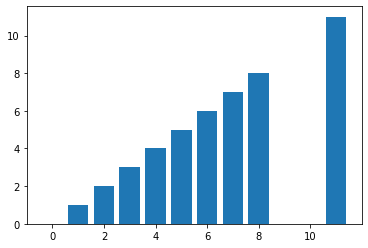

,D1_total,size
0,0,11930
1,1,1636
2,2,755
3,3,224
4,4,63
5,5,27
6,6,10
7,7,6
8,8,3
9,11,1


In [42]:
def map_value_D1(value):
    value_mappings = {0: 0, 1: 3, 2: 2, 3: 1}
    if type(value) == int:
        return value_mappings[value]
    else: 
        return value

def sum_D1(df: pd.DataFrame):
    """
    Sums the diagnostic classifications for patients
    Inputs: 
        pandas dataframe of clinical/biomarker data
    Returns:
        None, alters the inputted dataframe
    """
    cols = [col for col in df if col.startswith('D1_')]
    # only operating on set of selected columns 
    window = df[cols]
    # mapping classifiers to reflect weights
    window = window.applymap(map_value_D1)
    # summing each patient row to create total risk factor
    df['D1_total'] = window.sum(axis = 1)

df = get_cleaned_data()
clean_exit(df)
clean_D1(df)
sum_D1(df)

plt.bar(df['D1_total'], df['D1_total'])
plt.show()
df.groupby('D1_total', as_index=False).size()